#### Michela Mallick

### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

# Assignment activity 1

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

In [1]:
# My GitHub repository.
url = 'https://github.com/michelamallick/LSE_DA_NHS_analysis'

# Assignment activity 2

### Prepare your workstation

In [2]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
from datetime import date

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Function to find the number of missing values in each column of the dataframe
def find_missing_values(df: pd.DataFrame):
    for col in df.columns:
        print(col, df[col].isna().sum())


# Function to determine number of unique entries of each column from dataframe
def print_number_unique_entries(df: pd.DataFrame, column: str, show: bool = False):
    if show:
        print(f'''number of {column}: {len(df[column].unique())}''')
        print(pd.Series(df[column].unique()))
    else:
        print(len(df[column].unique()))

In [4]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


In [5]:
# Determine whether there are missing values.
find_missing_values(ad)

sub_icb_location_code 0
sub_icb_location_ons_code 0
sub_icb_location_name 0
icb_ons_code 0
region_ons_code 0
appointment_date 0
actual_duration 0
count_of_appointments 0


In [6]:
# Determine the metadata of the data set.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [7]:
# Determine the descriptive statistics of the data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [8]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [9]:
# Determine whether there are missing values.
find_missing_values(ar)

icb_ons_code 0
appointment_month 0
appointment_status 0
hcp_type 0
appointment_mode 0
time_between_book_and_appointment 0
count_of_appointments 0


In [10]:
# Determine the metadata of the data set.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [11]:
# Determine the descriptive statistics of the data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [12]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [13]:
# Determine whether there are missing values.
find_missing_values(nc)

appointment_date 0
icb_ons_code 0
sub_icb_location_name 0
service_setting 0
context_type 0
national_category 0
count_of_appointments 0
appointment_month 0


In [14]:
# Determine the metadata of the data set.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [15]:
# Determine the descriptive statistics of the data set.
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


### Explore the data set

**Question 1:** How many locations are there in the data set?

In [16]:
# Determine the number of locations.
print('Number of locations: '+str(len(ad['sub_icb_location_name'].unique())))

Number of locations: 106


**Question 2:** What are the five locations with the highest number of records?



In [17]:
# Determine the top five locations based on record count, on ad dataframe
ad['count_of_records']= ''
ad_top5loc = ad[['sub_icb_location_name', 'count_of_records']]\
    .groupby('sub_icb_location_name', as_index=False)\
    .count().sort_values('count_of_records', ascending=False)
ad_top5loc.head()

,sub_icb_location_name,count_of_records
34,NHS Greater Manchester ICB - 14L,1484
67,NHS North East London ICB - A3A8R,1484
65,NHS Norfolk and Waveney ICB - 26A,1484
47,NHS Kent and Medway ICB - 91Q,1484
76,NHS North West London ICB - W2U3Z,1484


In [18]:
# Determine the top five locations based on record count, using nc dataframe
nc['count_of_records']=''
nc_top5loc = nc[['sub_icb_location_name', 'count_of_records']]\
    .groupby('sub_icb_location_name', as_index=False)\
    .count().sort_values('count_of_records', ascending=False)
nc_top5loc.head()

,sub_icb_location_name,count_of_records
76,NHS North West London ICB - W2U3Z,13007
47,NHS Kent and Medway ICB - 91Q,12637
21,NHS Devon ICB - 15N,12526
36,NHS Hampshire and Isle Of Wight ICB - D9Y0V,12171
67,NHS North East London ICB - A3A8R,11837


**Between the two dataframes who have location information, we'll consider nc as it has the highest record count**

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [19]:
# Determine the number of service settings.
print_number_unique_entries(nc, 'service_setting', True)

number of service_setting: 5
0         Primary Care Network
1                        Other
2             General Practice
3                     Unmapped
4    Extended Access Provision
dtype: object


In [20]:
# Determine the number of context types.
print_number_unique_entries(nc, 'context_type', True)

number of context_type: 3
0    Care Related Encounter
1                  Unmapped
2      Inconsistent Mapping
dtype: object


In [21]:
# Determine the number of national categories.
print_number_unique_entries(nc, 'national_category', True)

number of national_category: 18
0                Patient contact during Care Home Round
1                                       Planned Clinics
2                                            Home Visit
3                            General Consultation Acute
4                          Structured Medication Review
5                                       Care Home Visit
6                                              Unmapped
7                                       Clinical Triage
8                            Planned Clinical Procedure
9                                  Inconsistent Mapping
10    Care Home Needs Assessment & Personalised Care...
11                         General Consultation Routine
12    Service provided by organisation external to t...
13                          Unplanned Clinical Activity
14                           Social Prescribing Service
15                      Non-contractual chargeable work
16               Group Consultation and Group Education
17              

In [22]:
# Determine the number of appointment status.
print_number_unique_entries(ar, 'appointment_status', True)

number of appointment_status: 3
0    Attended
1         DNA
2     Unknown
dtype: object


# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [23]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad.head()['appointment_date']

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [24]:
# View the first five rows of appointment_month for the ar DataFrame to determine the date format.
ar.head()['appointment_month']

0    2020-01
1    2020-01
2    2020-01
3    2020-01
4    2020-01
Name: appointment_month, dtype: object

In [25]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc.head()['appointment_date']

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [26]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(
    ad['appointment_date'], format='%d-%b-%y')

# View the DateFrame.
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,count_of_records
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364,
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619,
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698,
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277,
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730,
...,...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,31-60 Minutes,430,
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,21-30 Minutes,751,
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,16-20 Minutes,921,
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,11-15 Minutes,1439,


In [27]:
# Change the date format of ar['appointment_month'].
ar['appointment_month'] = pd.to_datetime(
    ar['appointment_month'], format='%Y-%m')

# View the DateFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06-01,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06-01,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,17


In [28]:
# Determine the minimum and maximum dates in the ar DataFrame.
# Use appropriate docstrings.
ar['appointment_month'].agg(['min', 'max'])

min   2020-01-01
max   2022-06-01
Name: appointment_month, dtype: datetime64[ns]

In [29]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
ad['appointment_date'].agg(['min', 'max'])

min   2021-12-01
max   2022-06-30
Name: appointment_date, dtype: datetime64[ns]

In [30]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
nc['appointment_date'].agg(['min', 'max'])

min   2021-08-01
max   2022-06-30
Name: appointment_date, dtype: datetime64[ns]

**Consideration about the granularity of the data:**
*the data type of the the data column of the first two data frames needed to be amended, although we have daily granularity for ad and monthly granularity for ar.*

**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [31]:
# For each of these service settings, determine the number of records available for the period and the location. 
NorthWestLondon = nc['sub_icb_location_name'].str.contains(
    'NHS North West London')
nc_NorthWestLondon = nc.loc[(NorthWestLondon) &
                            (nc['appointment_date'].dt.date >= date.fromisoformat('2022-01-01')) &
                            (nc['appointment_date'].dt.date <= date.fromisoformat('2022-06-01'))]

# View the output.
nc_NorthWestLondon.groupby('service_setting', as_index=False)\
    .sum('count_of_appointments')\
    .sort_values('count_of_appointments', ascending=False).head(1)

,service_setting,count_of_appointments
1,General Practice,4804239


**Question 3:** Which month had the highest number of appointments?

In [32]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
nc.groupby('appointment_month', as_index=False)\
    .sum('count_of_appointments')\
    .sort_values('count_of_appointments', ascending=False).head(1)
# considering the whole dataset as the previous subset was not specified for this question

,appointment_month,count_of_appointments
3,2021-11,30405070


**Question 4:** What was the total number of records per month?

In [33]:
# Total number of records per month.
nc[['appointment_month', 'count_of_records']].groupby('appointment_month', as_index=False)\
    .count()

,appointment_month,count_of_records
0,2021-08,69999
1,2021-09,74922
2,2021-10,74078
3,2021-11,77652
4,2021-12,72651
5,2022-01,71896
6,2022-02,71769
7,2022-03,82822
8,2022-04,70012
9,2022-05,77425


# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [34]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize': (15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [35]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype(str)

In [36]:
# Aggregate on monthly level and determine the sum of records per month.
nc_records_bymonth = nc[['appointment_month', 'count_of_records']].groupby('appointment_month', as_index=False)\
    .count()

# View output.
nc_records_bymonth

,appointment_month,count_of_records
0,2021-08,69999
1,2021-09,74922
2,2021-10,74078
3,2021-11,77652
4,2021-12,72651
5,2022-01,71896
6,2022-02,71769
7,2022-03,82822
8,2022-04,70012
9,2022-05,77425


**Service settings:**

[Text(0.5, 1.0, 'Total Appointments and General Practice Appointments')]

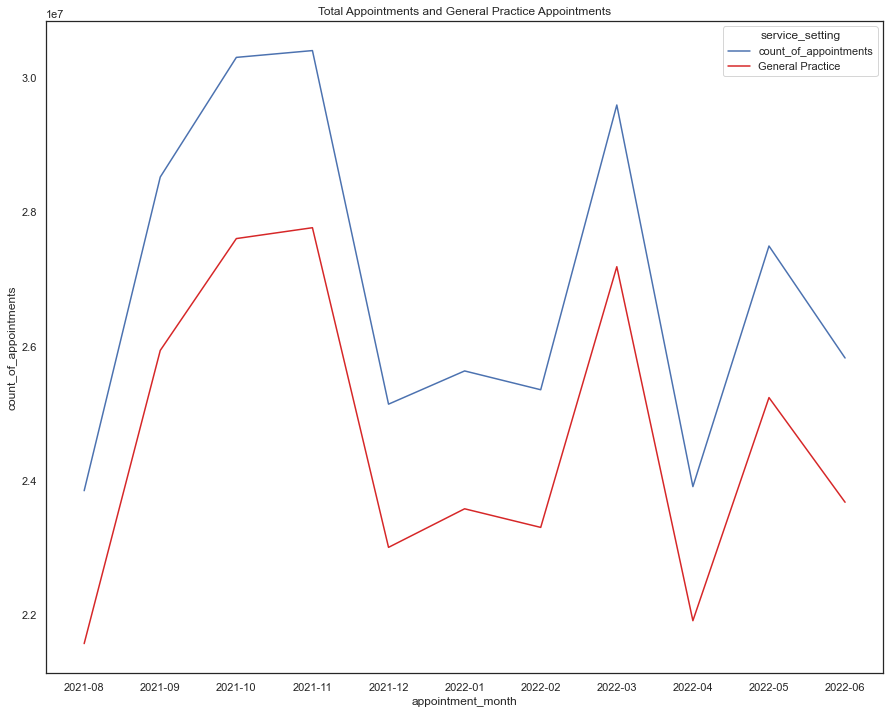

In [37]:
# Plot the appointments over the available date range
# Total Appointments grouped by month
nc_bydateAppointments = nc[['appointment_month', 'count_of_appointments']]\
    .groupby(['appointment_month'], as_index=False)\
    .agg({'count_of_appointments': 'sum'}).sort_values('appointment_month')

# General Practice Appointments by month
nc_bydateAppointments_ServiceSetting = nc[['appointment_month', 'count_of_appointments', 'service_setting']]\
    .groupby(['appointment_month', 'service_setting'], as_index=False)\
    .agg({'count_of_appointments': 'sum'}).sort_values('appointment_month')

# Create a lineplot to show total appointments (for all service setting) and General Practice appointments
sns.lineplot(data=nc_bydateAppointments)
sns.lineplot(data=nc_bydateAppointments_ServiceSetting
             [nc_bydateAppointments_ServiceSetting['service_setting']
                 == 'General Practice'],
             x='appointment_month', y='count_of_appointments',
             hue='service_setting', palette={'General Practice': 'tab:red'})\
    .set(title='Total Appointments and General Practice Appointments')

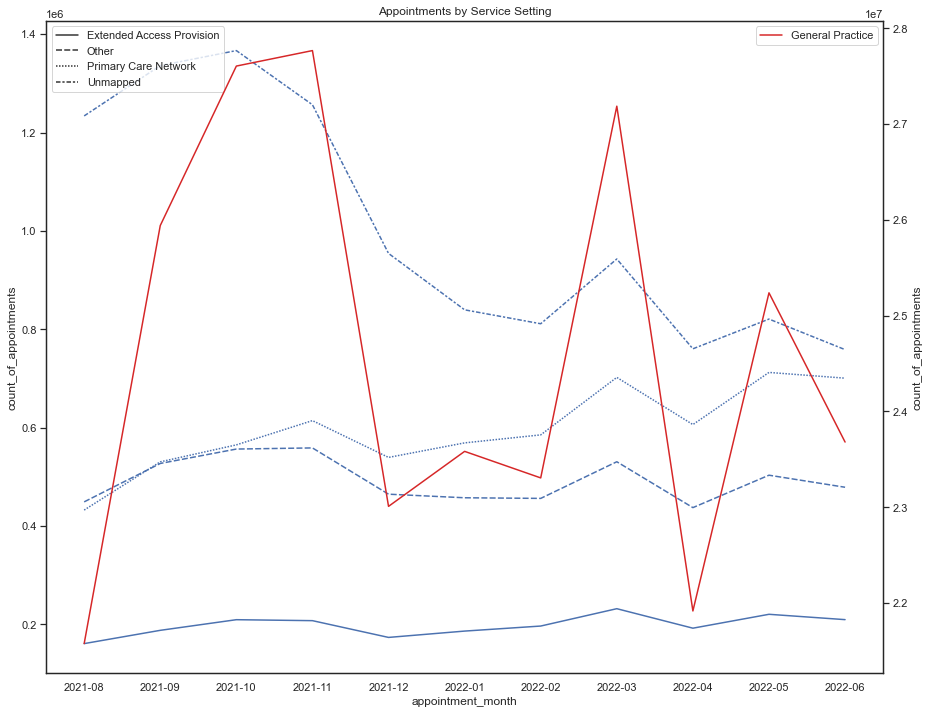

In [38]:
# Appointments by Service settings by month dataframe
nc_bydateAppointments_ServiceSetting = nc[['appointment_month', 'count_of_appointments', 'service_setting']]\
    .groupby(['appointment_month', 'service_setting'], as_index=False)\
    .agg({'count_of_appointments': 'sum'}).sort_values('appointment_month')

# Create a lineplot for Appointments by Service settings by month
sns.lineplot(data=nc_bydateAppointments_ServiceSetting
             [nc_bydateAppointments_ServiceSetting['service_setting']
                 != 'General Practice'],
             x='appointment_month', y='count_of_appointments', style='service_setting',
             palette={'Extended Access Provision': 'tab:blue',
                      'Other': 'tab:green', 'Primary Care Network': 'tab:orange', 'Unmapped': 'tab:cyan'})
plt.legend(loc='upper left')

# Includes General Practice indicated on a different scale to help the visualisation
ax2 = plt.twinx()
sns.lineplot(data=nc_bydateAppointments_ServiceSetting
             [nc_bydateAppointments_ServiceSetting['service_setting']
                 == 'General Practice'],
             x='appointment_month', y='count_of_appointments',
             hue='service_setting', ax=ax2, palette={'General Practice': 'tab:red'})\
    .set(title='Appointments by Service Setting')
plt.legend(loc='upper right')

[Text(0.5, 1.0, 'Appointments by Service Setting: General Practice')]

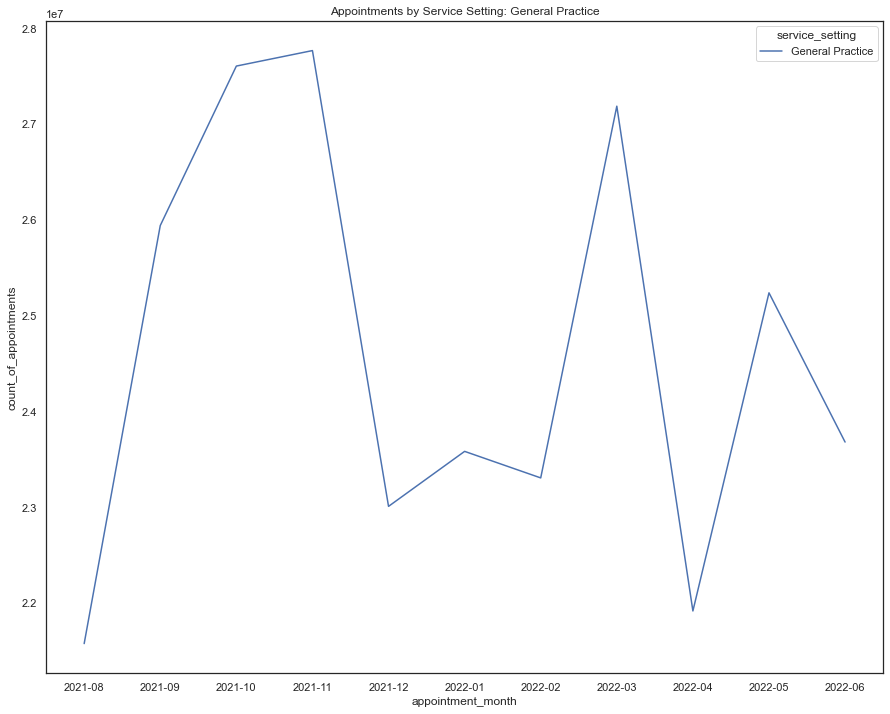

In [39]:
sns.lineplot(data=nc_bydateAppointments_ServiceSetting
             [nc_bydateAppointments_ServiceSetting['service_setting']
                 == 'General Practice'],
             x='appointment_month', y='count_of_appointments', hue='service_setting')\
    .set(title='Appointments by Service Setting: General Practice')

**Context types:**

In [40]:
# Create a separate data set that can be used in future weeks.
nc_bydateAppointments_ContextTypes = nc[['appointment_month', 'count_of_appointments', 'context_type']]\
    .groupby(['appointment_month', 'context_type'], as_index=False)\
    .agg({'count_of_appointments': 'sum'}).sort_values('appointment_month')

# View output.
print(nc_bydateAppointments_ContextTypes.head())
print(nc_bydateAppointments_ContextTypes.tail())

  appointment_month            context_type  count_of_appointments
0           2021-08  Care Related Encounter               20255235
1           2021-08    Inconsistent Mapping                2363093
2           2021-08                Unmapped                1233843
3           2021-09  Care Related Encounter               24404251
4           2021-09    Inconsistent Mapping                2782135
   appointment_month            context_type  count_of_appointments
28           2022-05    Inconsistent Mapping                2573495
29           2022-05                Unmapped                 820770
30           2022-06  Care Related Encounter               22621827
31           2022-06    Inconsistent Mapping                2447611
32           2022-06                Unmapped                 758640


[Text(0.5, 1.0, 'Appointments by Context type: Care Related Encounter')]

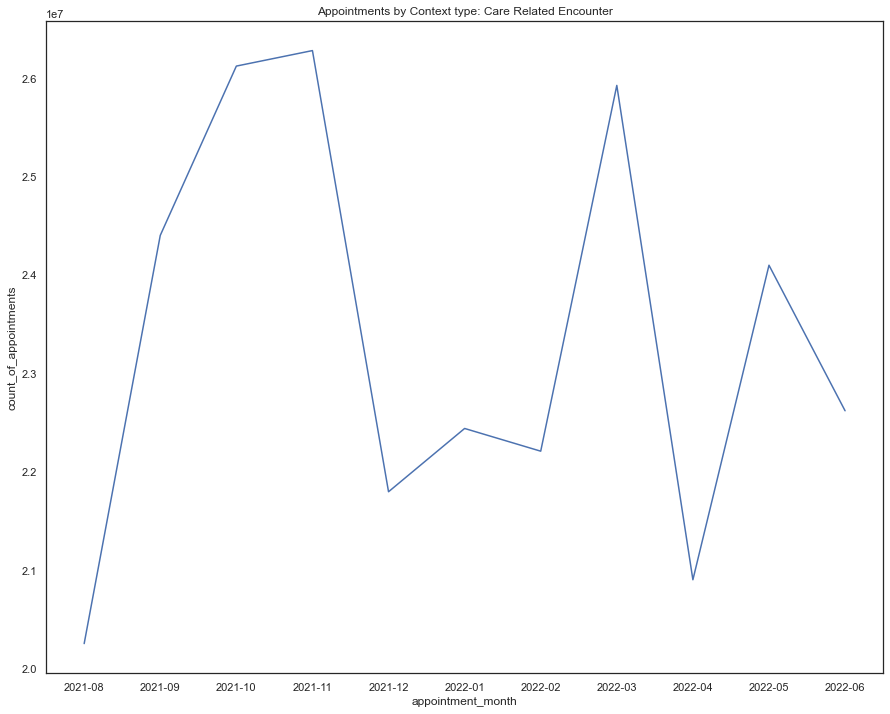

In [41]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
sns.color_palette("colorblind")
sns.lineplot(data=nc_bydateAppointments_ContextTypes[nc_bydateAppointments_ContextTypes['context_type']
                                                     == 'Care Related Encounter'],
             x='appointment_month', y='count_of_appointments')\
.set(title='Appointments by Context type: Care Related Encounter')

[Text(0.5, 1.0, 'Appointments by Context type: Inconsistent Mapping/Unmapped')]

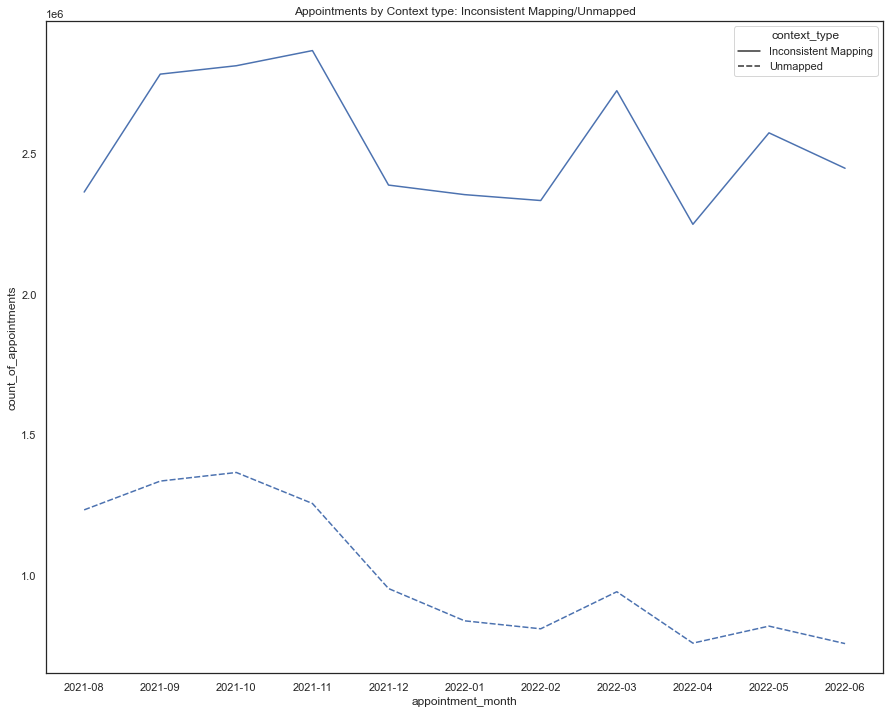

In [43]:
sns.lineplot(data=nc_bydateAppointments_ContextTypes[nc_bydateAppointments_ContextTypes['context_type']
                                                     != 'Care Related Encounter'],
             x='appointment_month', y='count_of_appointments', style='context_type')\
.set(title='Appointments by Context type: Inconsistent Mapping/Unmapped')

**Since context type contains three categories 2 of which correspond to inconsistent/unmapped data, it is meaningful to plot these 2 subsets separately**

**National categories:**

In [46]:
# Create a separate data set that can be used in future weeks.
# Total appointments by national category
nc_nctotapp = nc[['appointment_month',
                   'count_of_appointments', 'national_category']]\
    .groupby('national_category')\
    .sum().sort_values('count_of_appointments', ascending=False)

# View output.
nc_nctotapp

,count_of_appointments
national_category,
General Consultation Routine,97271522
General Consultation Acute,53691150
Clinical Triage,41546964
Planned Clinics,28019748
Inconsistent Mapping,27890802
Planned Clinical Procedure,25702694
Unmapped,11080810
Unplanned Clinical Activity,3055794
Home Visit,2144452


In [47]:
# As there are 18 categories, I counted the total of appointment per category in millions, to get a sense of the scale of the categories
nc_ncapp = nc[['appointment_month', 'count_of_appointments', 'national_category']]\
    .groupby(['national_category'], as_index=False)\
    .agg({'count_of_appointments': 'sum'}).sort_values(['count_of_appointments'], ascending=False)
nc_ncapp['app_m'] = nc_ncapp['count_of_appointments']/(10**6)
nc_ncapp = nc_ncapp[['national_category', 'app_m']]
nc_ncapp

,national_category,app_m
4,General Consultation Routine,97.271522
3,General Consultation Acute,53.691150
2,Clinical Triage,41.546964
11,Planned Clinics,28.019748
7,Inconsistent Mapping,27.890802
10,Planned Clinical Procedure,25.702694
15,Unmapped,11.080810
16,Unplanned Clinical Activity,3.055794
6,Home Visit,2.144452
14,Structured Medication Review,1.858379


In [48]:
# Plot the appointments over the available date range, and review the national categories for months.
nc_ncappbynmonth = nc[['appointment_month', 'count_of_appointments', 'national_category']]\
    .groupby(['appointment_month', 'national_category'], as_index=False)\
    .agg({'count_of_appointments': 'sum'}).sort_values(['appointment_month','count_of_appointments', 'national_category'], ascending=True)

nc_ncappbynmonth = nc_ncappbynmonth.merge(nc_ncapp)
nc_ncappbynmonth

,appointment_month,national_category,count_of_appointments,app_m
0,2021-08,Group Consultation and Group Education,5161,0.060632
1,2021-09,Group Consultation and Group Education,5892,0.060632
2,2021-10,Group Consultation and Group Education,5528,0.060632
3,2021-11,Group Consultation and Group Education,5907,0.060632
4,2021-12,Group Consultation and Group Education,4790,0.060632
...,...,...,...,...
193,2022-02,General Consultation Routine,8565715,97.271522
194,2022-03,General Consultation Routine,10074249,97.271522
195,2022-04,General Consultation Routine,7998377,97.271522
196,2022-05,General Consultation Routine,9320538,97.271522


[Text(0.5, 1.0, '1. Appointments by National categories - More than 3.5M Total Appointments')]

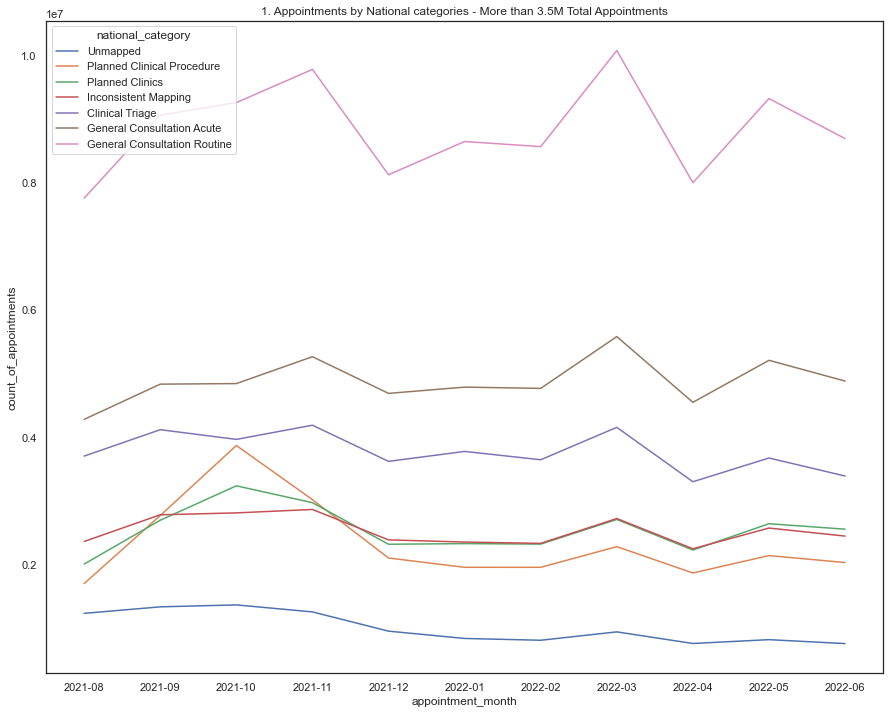

In [120]:
# Plot 1 of 2: Categories split by magnitude to increase readability
sns.lineplot(data=nc_ncappbynmonth[nc_ncappbynmonth['app_m'] >= 3.5],
             x='appointment_month', y='count_of_appointments', hue='national_category')\
    .set(title='1. Appointments by National categories - More than 3.5M Total Appointments')

[Text(0.5, 1.0, '2. Appointments by National categories - Less than 3.5M Total Appointments')]

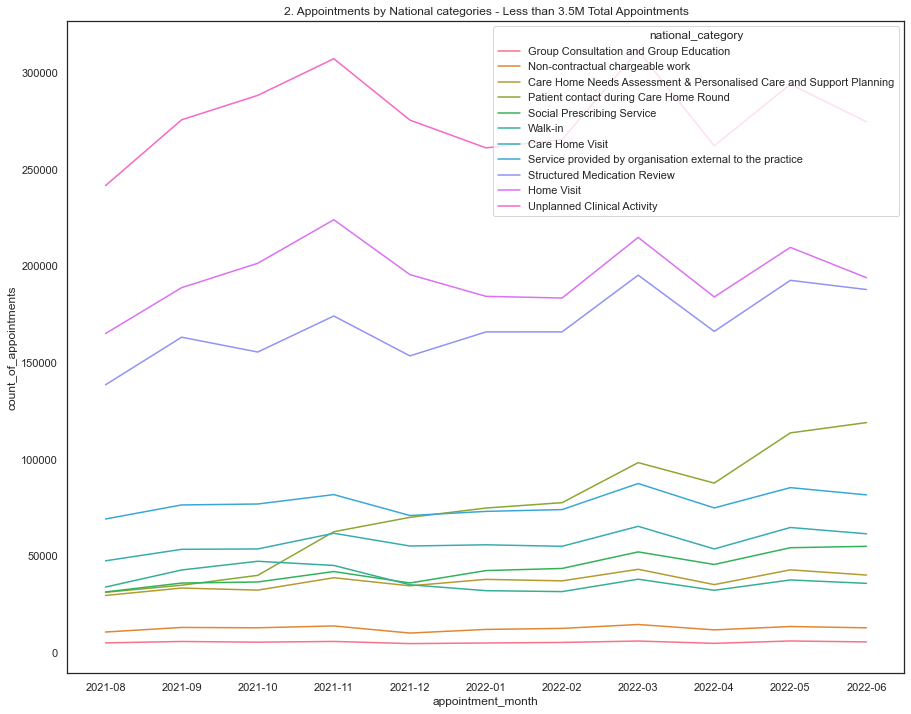

In [121]:
# Plot 2 of 2: Categories split by magnitude to increase readability
sns.lineplot(data=nc_ncappbynmonth[nc_ncappbynmonth['app_m'] < 3.5],
             x='appointment_month', y='count_of_appointments', hue='national_category')\
    .set(title='2. Appointments by National categories - Less than 3.5M Total Appointments')

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [54]:
# Create a separate data set that can be used in future weeks.
ServiceSetting_Summer = nc[nc['appointment_date'].dt.date < date.fromisoformat('2021-09-01')][['appointment_date', 'count_of_appointments', 'service_setting']]\
    .groupby(['appointment_date', 'service_setting'], as_index=False)\
    .agg({'count_of_appointments': 'sum'}).sort_values(['appointment_date', 'count_of_appointments'], ascending=False)

# View output.
ServiceSetting_Summer

,appointment_date,service_setting,count_of_appointments
151,2021-08-31,General Practice,1125584
154,2021-08-31,Unmapped,62380
152,2021-08-31,Other,23181
153,2021-08-31,Primary Care Network,21789
150,2021-08-31,Extended Access Provision,8281
...,...,...,...
1,2021-08-01,General Practice,3411
4,2021-08-01,Unmapped,1054
0,2021-08-01,Extended Access Provision,438
2,2021-08-01,Other,401


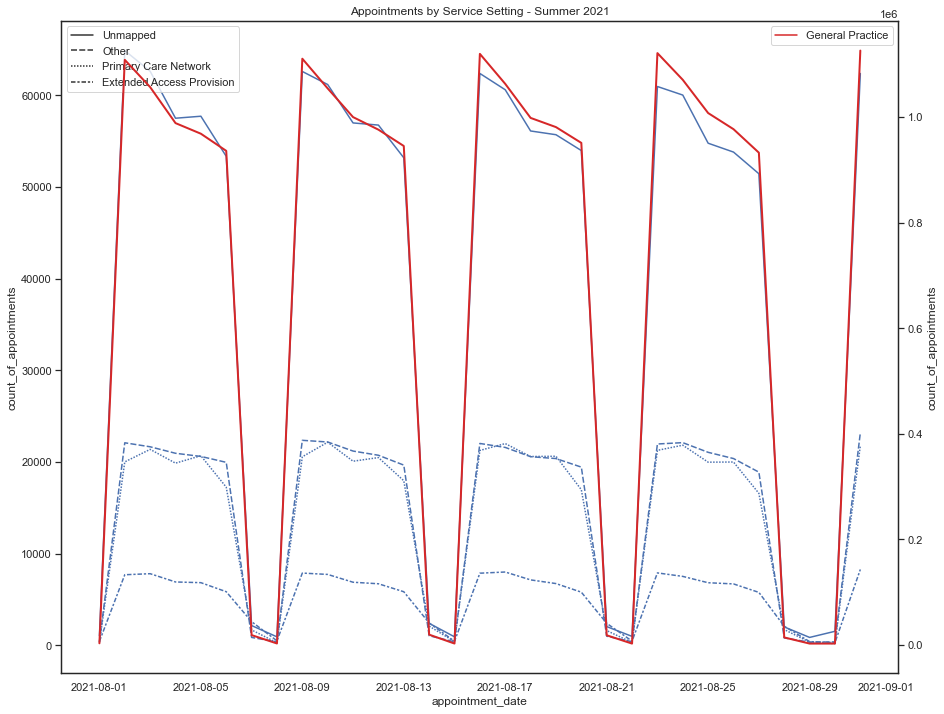

In [55]:
# Look at August 2021 in more detail to allow a closer look.
# Create a lineplot.
sns.lineplot(data=ServiceSetting_Summer\
             [ServiceSetting_Summer['service_setting']!='General Practice'],\
                x='appointment_date', y='count_of_appointments', style='service_setting', 
                 palette = {'Extended Access Provision': 'tab:blue',
                            'Other': 'tab:green', 'Primary Care Network': 'tab:orange','Unmapped': 'tab:cyan'})
plt.legend(loc='upper left')

# General Practice indicated on a different scale to help the visualisation
ax2=plt.twinx()
sns.lineplot(data=ServiceSetting_Summer\
             [ServiceSetting_Summer['service_setting']=='General Practice'],\
                x='appointment_date', y='count_of_appointments', 
                 hue='service_setting', ax=ax2, palette = {'General Practice': 'tab:red'}, linewidth=2)\
                    .set(title='Appointments by Service Setting - Summer 2021')
plt.legend(loc='upper right')

**Autumn (October 2021):**

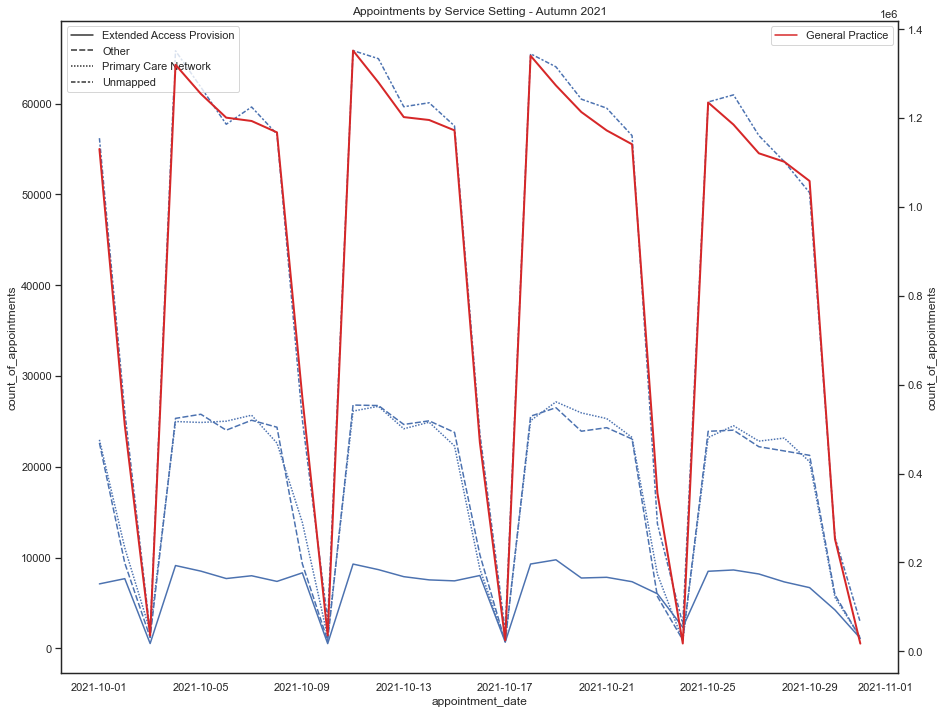

In [56]:
# Look at October 2021 in more detail to allow a closer look.
ServiceSetting_Autumn=nc.loc[(nc['appointment_date'].dt.date>=date.fromisoformat('2021-10-01'))&\
                        (nc['appointment_date'].dt.date<date.fromisoformat('2021-11-01'))]\
                        [['appointment_date', 'count_of_appointments','service_setting']]\
                        .groupby(['appointment_date','service_setting'],as_index=False)\
                        .agg({'count_of_appointments':'sum'}).sort_values('appointment_date')

# Create a lineplot.
sns.lineplot(data=ServiceSetting_Autumn\
             [ServiceSetting_Autumn['service_setting']!='General Practice'],\
                x='appointment_date', y='count_of_appointments', style='service_setting', 
                 palette = {'Extended Access Provision': 'tab:blue',
                            'Other': 'tab:green', 'Primary Care Network': 'tab:orange','Unmapped': 'tab:cyan'})
plt.legend(loc='upper left')

# General Practice indicated on a different scale to help the visualisation
ax2=plt.twinx()
sns.lineplot(data=ServiceSetting_Autumn\
             [ServiceSetting_Autumn['service_setting']=='General Practice'],\
                x='appointment_date', y='count_of_appointments', 
                 hue='service_setting', ax=ax2, palette = {'General Practice': 'tab:red'}, linewidth=2)\
                    .set(title='Appointments by Service Setting - Autumn 2021')
plt.legend(loc='upper right')

**Winter (January 2022):**

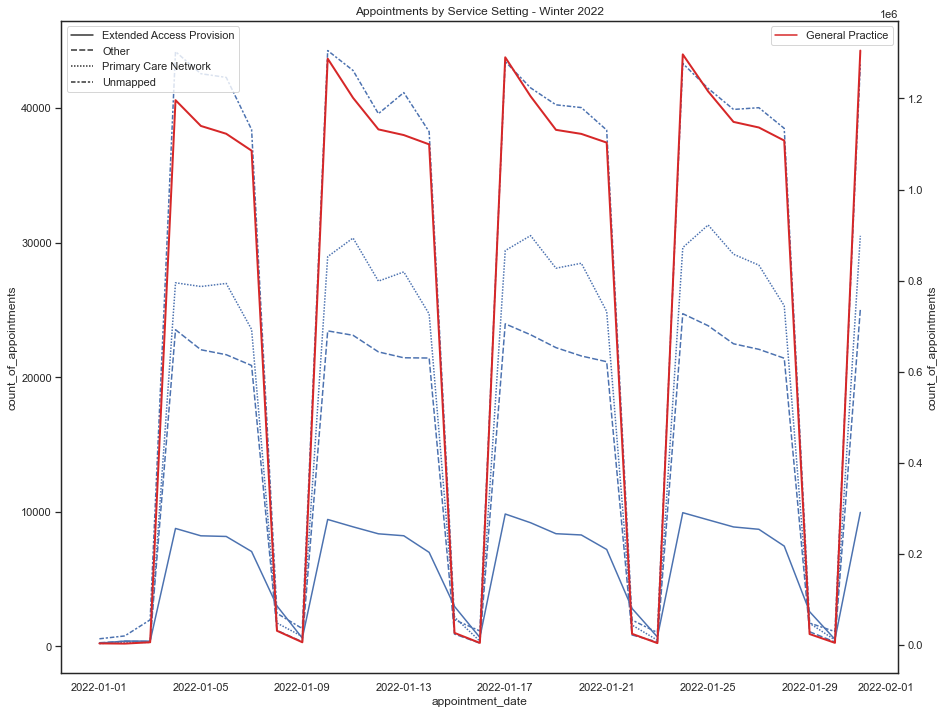

In [57]:
# Look at January 2022 in more detail to allow a closer look.
ServiceSetting_Winter=nc.loc[(nc['appointment_date'].dt.date>=date.fromisoformat('2022-01-01'))&\
                        (nc['appointment_date'].dt.date<date.fromisoformat('2022-02-01'))]\
                        [['appointment_date', 'count_of_appointments','service_setting']]\
                        .groupby(['appointment_date','service_setting'],as_index=False)\
                        .agg({'count_of_appointments':'sum'}).sort_values('appointment_date')
# Create a lineplot.
sns.lineplot(data=ServiceSetting_Winter\
             [ServiceSetting_Winter['service_setting']!='General Practice'],\
                x='appointment_date', y='count_of_appointments', style='service_setting', 
                 palette = {'Extended Access Provision': 'tab:blue',
                            'Other': 'tab:green', 'Primary Care Network': 'tab:orange','Unmapped': 'tab:cyan'})
plt.legend(loc='upper left')

# General Practice indicated on a different scale to help the visualisation
ax2=plt.twinx()
sns.lineplot(data=ServiceSetting_Winter\
             [ServiceSetting_Winter['service_setting']=='General Practice'],\
                x='appointment_date', y='count_of_appointments', 
                 hue='service_setting', ax=ax2, palette = {'General Practice': 'tab:red'}, linewidth=2)\
                    .set(title='Appointments by Service Setting - Winter 2022')
plt.legend(loc='upper right')

**Spring (April 2022):**

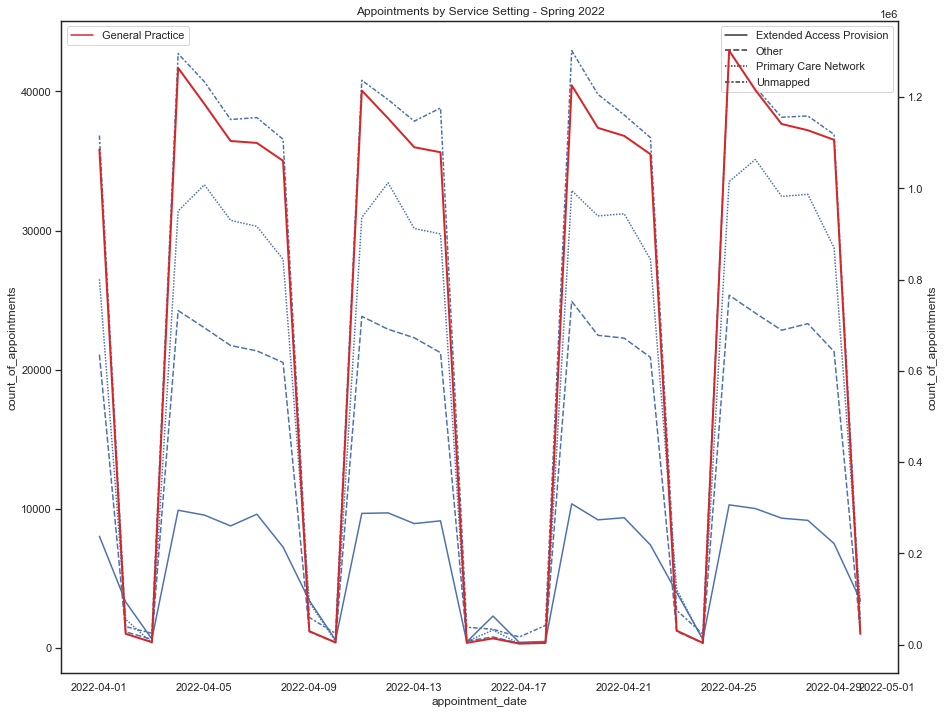

In [58]:
# Look at April 2022 in more detail to allow a closer look.
ServiceSetting_Spring=nc.loc[(nc['appointment_date'].dt.date>=date.fromisoformat('2022-04-01'))&\
                        (nc['appointment_date'].dt.date<date.fromisoformat('2022-05-01'))]\
                        [['appointment_date', 'count_of_appointments','service_setting']]\
                        .groupby(['appointment_date','service_setting'],as_index=False)\
                        .agg({'count_of_appointments':'sum'}).sort_values('appointment_date')
# Create a lineplot.
sns.lineplot(data=ServiceSetting_Spring\
             [ServiceSetting_Spring['service_setting']!='General Practice'],\
                x='appointment_date', y='count_of_appointments', style='service_setting', 
                 palette = {'Extended Access Provision': 'tab:blue',
                            'Other': 'tab:green', 'Primary Care Network': 'tab:orange','Unmapped': 'tab:cyan'})
plt.legend(loc='upper right')

# General Practice indicated on a different scale to help the visualisation
ax2=plt.twinx()
sns.lineplot(data=ServiceSetting_Spring\
             [ServiceSetting_Spring['service_setting']=='General Practice'],\
                x='appointment_date', y='count_of_appointments', 
                 hue='service_setting', ax=ax2, palette = {'General Practice': 'tab:red'}, linewidth=2)\
                    .set(title='Appointments by Service Setting - Spring 2022')
plt.legend(loc='upper left')

# 

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [59]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [60]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
tweets

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
...,...,...,...,...,...,...,...,...,...,...
1169,1567583004209332227,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…,"{'hashtags': [{'text': 'Innovation', 'indices': [29, 40]}, {'text': 'precisionFabrication', 'indices': [50, 71]}, {'text': 'Microfluidic', 'indices': [92, 105]}], 'symbols': [], 'user_mentions': [...","#Innovation, #precisionFabrication, #Microfluidic","{'iso_language_code': 'en', 'result_type': 'recent'}",1,0,False,False,en
1170,1567582945342267393,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie...","{'hashtags': [{'text': 'SKPoli', 'indices': [232, 239]}, {'text': 'healthcare', 'indices': [240, 251]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/33f7Dz5FrU', 'expanded_u...","#SKPoli, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,1,False,False,en
1171,1567582936014241792,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp...","{'hashtags': [{'text': 'webinar', 'indices': [149, 157]}, {'text': 'ESG', 'indices'

In [61]:
# Explore the metadata.
tweets['tweet_metadata']

0       {'iso_language_code': 'en', 'result_type': 'recent'}
1       {'iso_language_code': 'en', 'result_type': 'recent'}
2       {'iso_language_code': 'en', 'result_type': 'recent'}
3       {'iso_language_code': 'en', 'result_type': 'recent'}
4       {'iso_language_code': 'en', 'result_type': 'recent'}
                                ...                         
1169    {'iso_language_code': 'en', 'result_type': 'recent'}
1170    {'iso_language_code': 'en', 'result_type': 'recent'}
1171    {'iso_language_code': 'en', 'result_type': 'recent'}
1172    {'iso_language_code': 'en', 'result_type': 'recent'}
1173    {'iso_language_code': 'en', 'result_type': 'recent'}
Name: tweet_metadata, Length: 1174, dtype: object

In [62]:
# Explore the data set.
print(tweets.info())
tweets.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB
None


,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [63]:
len(tweets['tweet_id'].unique())

1174

In [64]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.
print(tweets[['tweet_retweet_count', 'tweet_favorite_count']].value_counts())

tweet_retweet_count  tweet_favorite_count
0                    0                       436
1                    0                       189
2                    0                       100
0                    1                        70
3                    0                        62
                                            ... 
9                    5                         1
12                   42                        1
13                   0                         1
14                   0                         1
303                  0                         1
Length: 79, dtype: int64


In [65]:
# Create a new DataFrame containing only the text.
tweets_text=pd.DataFrame(tweets['tweet_full_text'])

# View the DataFrame.
tweets_text

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."
...,...
1169,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…
1170,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie..."
1171,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp..."
1172,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC


In [67]:
# Loop through the messages, and create a list of values containing the # symbol.
tags=[]
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

In [68]:
# Display the first 30 records.
tags=pd.Series(tags).value_counts()
tags.head(30)

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [69]:
# Convert the series to a DataFrame in preparation for visualisation.
# Rename the columns.
tags=pd.DataFrame({'hashtag':tags.index, 'count':tags.values})

In [70]:
# Fix the count datatype.
tags.info()
#count are already integers

# View the result.
tags

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   hashtag  1754 non-null   object
 1   count    1754 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.5+ KB


,hashtag,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1749,#evestudy,1
1750,#patientdata…,1
1751,#secure,1
1752,#sms,1


In [71]:
# Display records where the count is larger than 10.
top10=tags[tags['count']>10]
top10

,hashtag,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


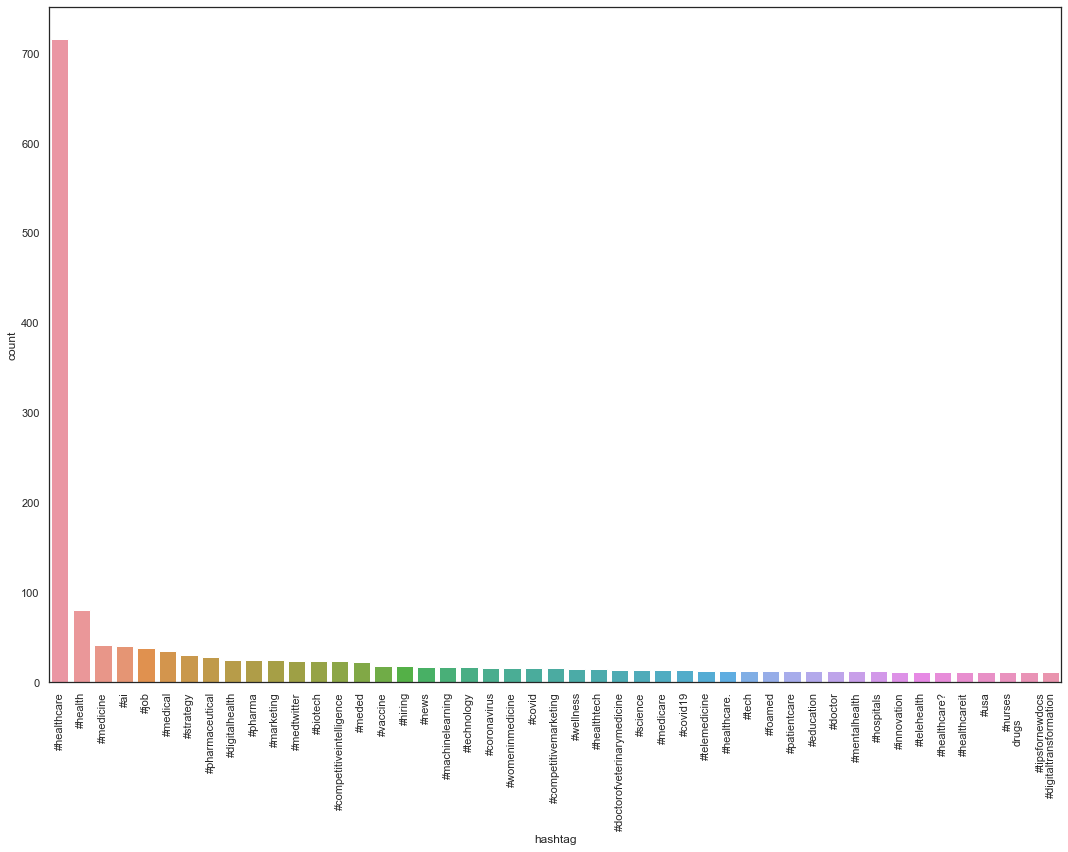

In [72]:
# Create a Seaborn barplot indicating records with a count >10 records.
sns.barplot(data=top10, x='hashtag', y='count')
plt.xticks(rotation=90)
plt.tight_layout()

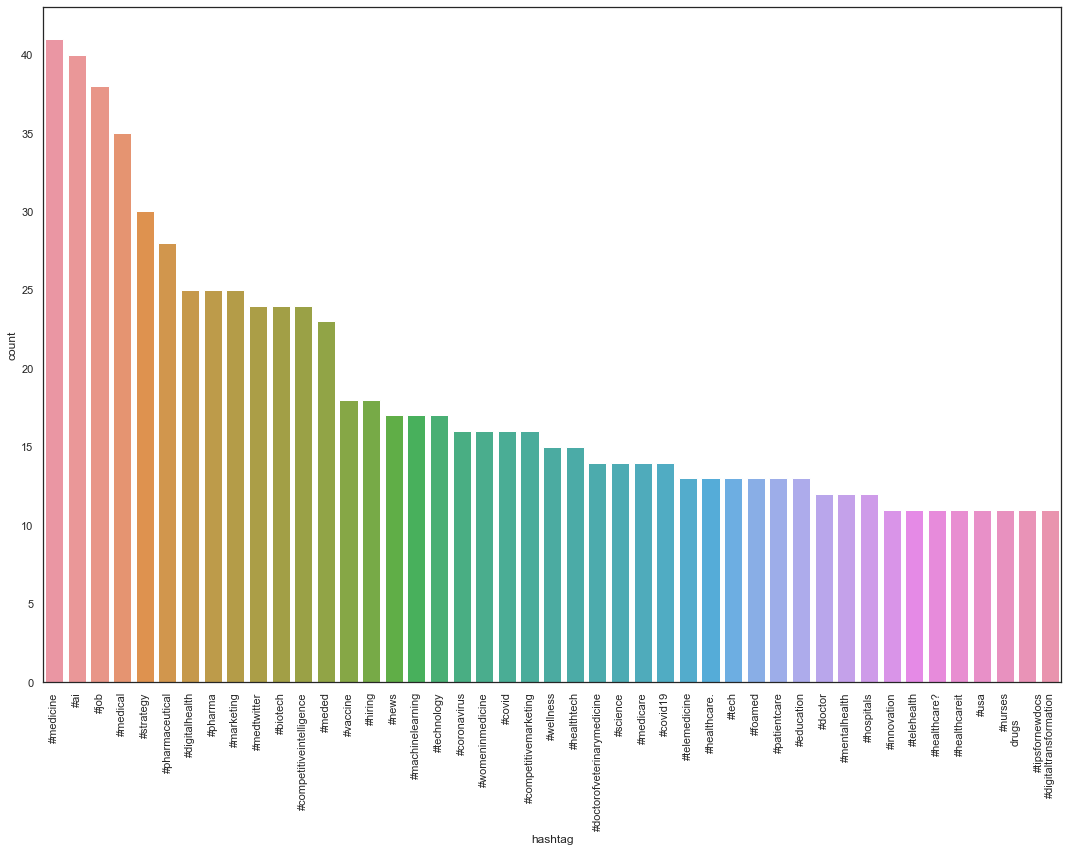

In [73]:
# Create the plot.
# View the barplot.
sns.barplot(data=top10.iloc[2:], x='hashtag', y='count')
plt.xticks(rotation=90)
plt.tight_layout()

# 

# Assignment activity 6

### Investigate the main concerns posed by the NHS. 

In [74]:
# Prepare your workstation.
# Load the appointments_regional.csv file.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [75]:
# Print the min and max dates.
ar['appointment_month'].agg(['min', 'max'])

min    2020-01
max    2022-06
Name: appointment_month, dtype: object

In [76]:
# Filter the data set to only look at data from 2021-08 onwards.
ar['appointment_month_date']=pd.to_datetime(ar['appointment_month'], format='%Y-%m')
ar_2021_08=ar[ar['appointment_month_date'].dt.date>=date.fromisoformat('2021-08-01')]
ar_2021_08

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,appointment_month_date
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553,2021-08-01
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390,2021-08-01
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547,2021-08-01
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937,2021-08-01
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961,2021-08-01
...,...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21,2022-06-01
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8,2022-06-01
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28,2022-06-01
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17,2022-06-01


In [77]:
# Creating an ordinal variable to represent waiting times, to create a meaningful ascending order in the plot
mapper = {'Same Day':0, '1 Day':1, '2 to 7 Days':2, '8  to 14 Days':3, '15  to 21 Days':4, '22  to 28 Days':5, 'More than 28 Days':6, 'Unknown / Data Quality':7}
ar_2021_08['waiting_time_ordinal']=[mapper[x] for x in ar_2021_08['time_between_book_and_appointment']]
ar_2021_08

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,appointment_month_date,waiting_time_ordinal
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553,2021-08-01,1
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390,2021-08-01,4
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547,2021-08-01,2
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937,2021-08-01,5
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961,2021-08-01,3
...,...,...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21,2022-06-01,2
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8,2022-06-01,5
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28,2022-06-01,3
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17,2022-06-01,6


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [90]:
# Create an aggregated data set to review the different features.
# View the DataFrame.

# 1. Observing issues with waiting times, by aggregating number of appointments by waiting time
wt = ar_2021_08.groupby(['time_between_book_and_appointment', 'waiting_time_ordinal'], as_index=False)\
    .sum('count_of_appointments').sort_values('waiting_time_ordinal', ascending=True).reset_index(drop=True)
wt

,time_between_book_and_appointment,waiting_time_ordinal,count_of_appointments
0,Same Day,0,130976642
1,1 Day,1,25872974
2,2 to 7 Days,2,60734100
3,8 to 14 Days,3,37507051
4,15 to 21 Days,4,19454328
5,22 to 28 Days,5,11430584
6,More than 28 Days,6,9880538
7,Unknown / Data Quality,7,190553


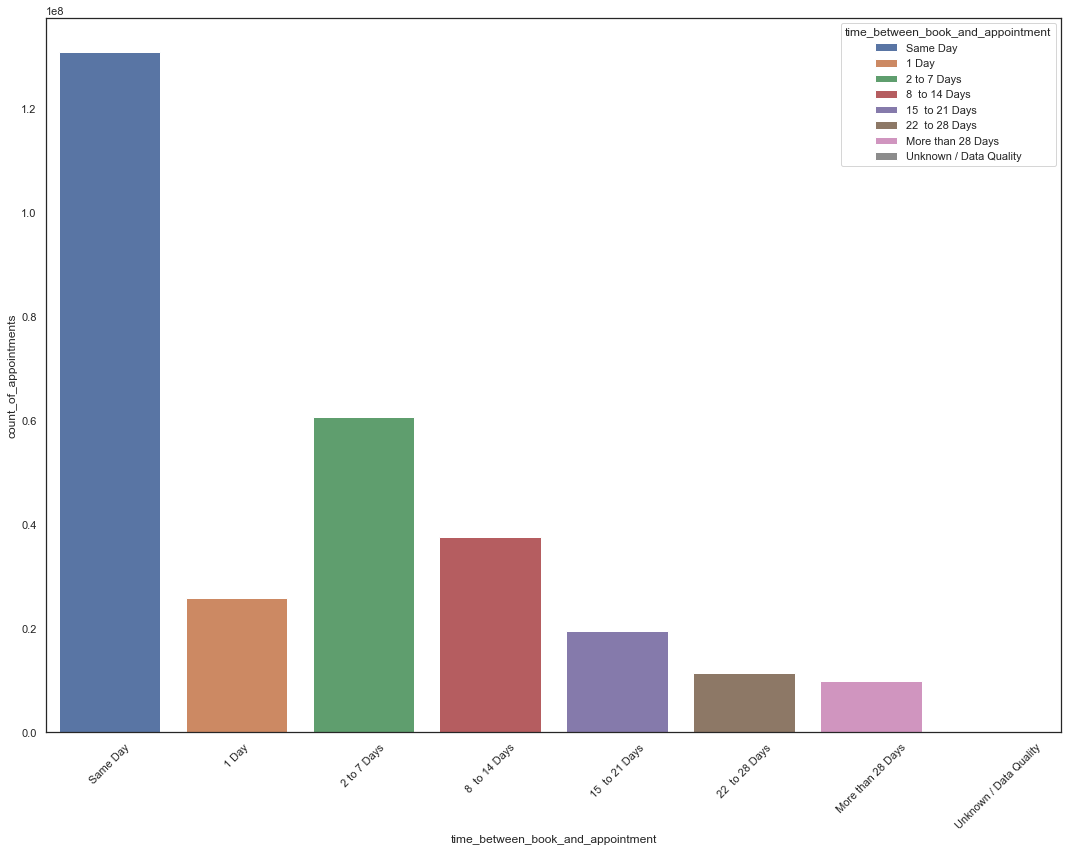

In [91]:
sns.barplot(data=wt, x='time_between_book_and_appointment', y='count_of_appointments', 
            hue='time_between_book_and_appointment', dodge=False)
plt.xticks(rotation=45)
plt.tight_layout()

In [92]:
# 2. Observing issues with waiting times, by aggregating number of appointments by waiting time & appointment mode
am=ar_2021_08.groupby(['appointment_mode', 'time_between_book_and_appointment', 'waiting_time_ordinal'], as_index=False)\
.sum('count_of_appointments').sort_values(['appointment_mode', 'waiting_time_ordinal'], ascending=True)
am

,appointment_mode,time_between_book_and_appointment,waiting_time_ordinal,count_of_appointments
6,Face-to-Face,Same Day,0,65792768
0,Face-to-Face,1 Day,1,16111422
2,Face-to-Face,2 to 7 Days,2,42303114
4,Face-to-Face,8 to 14 Days,3,27862128
1,Face-to-Face,15 to 21 Days,4,14501752
3,Face-to-Face,22 to 28 Days,5,8710315
5,Face-to-Face,More than 28 Days,6,8116493
7,Face-to-Face,Unknown / Data Quality,7,105595
14,Home Visit,Same Day,0,1119586
8,Home Visit,1 Day,1,288216


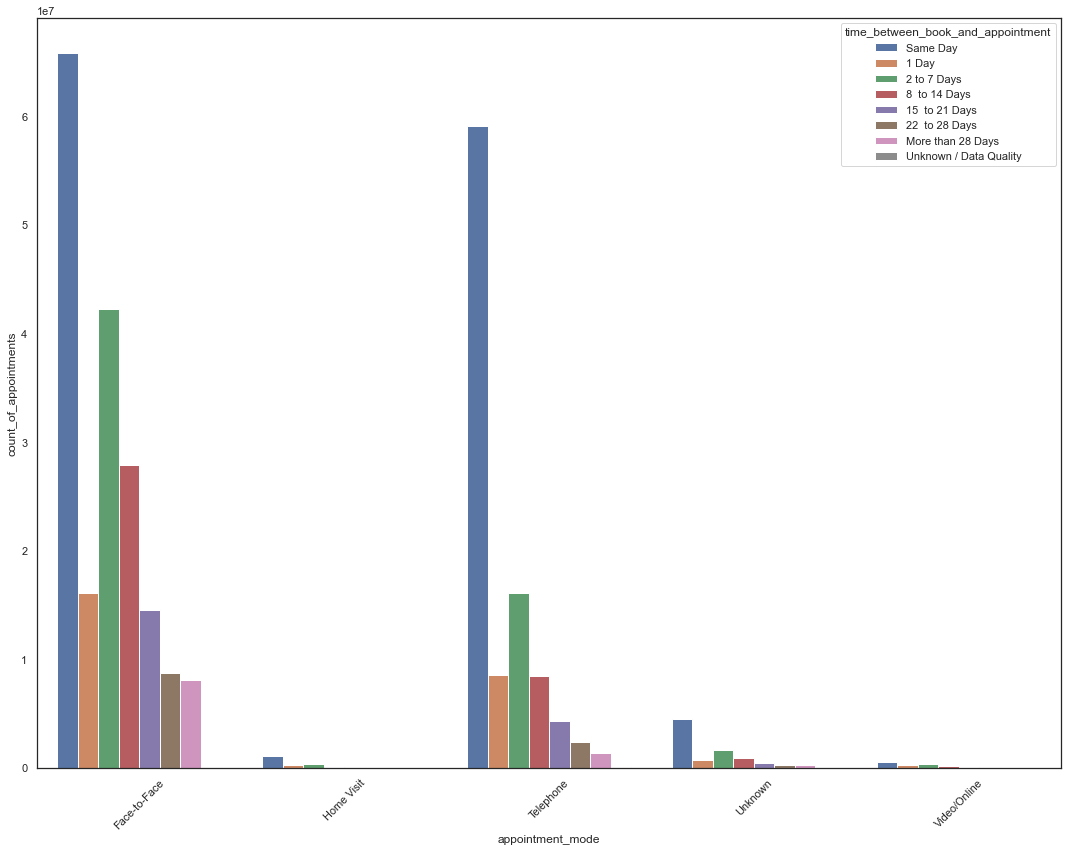

In [93]:
sns.barplot(data=am, x='appointment_mode', y='count_of_appointments', hue='time_between_book_and_appointment')
plt.xticks(rotation=45)
plt.tight_layout()

In [83]:
# 3. Observing issues with waiting times, by aggregating number of appointments by waiting time & health professional
am=ar_2021_08.groupby(['hcp_type', 'time_between_book_and_appointment', 'waiting_time_ordinal'], as_index=False)\
.sum('count_of_appointments').sort_values(['hcp_type', 'waiting_time_ordinal'], ascending=True)
am

,hcp_type,time_between_book_and_appointment,waiting_time_ordinal,count_of_appointments
6,GP,Same Day,0,84313011
0,GP,1 Day,1,13045690
2,GP,2 to 7 Days,2,25264139
4,GP,8 to 14 Days,3,12958848
1,GP,15 to 21 Days,4,6671293
3,GP,22 to 28 Days,5,3655241
5,GP,More than 28 Days,6,2371934
7,GP,Unknown / Data Quality,7,91286
14,Other Practice staff,Same Day,0,40690028
8,Other Practice staff,1 Day,1,11937559


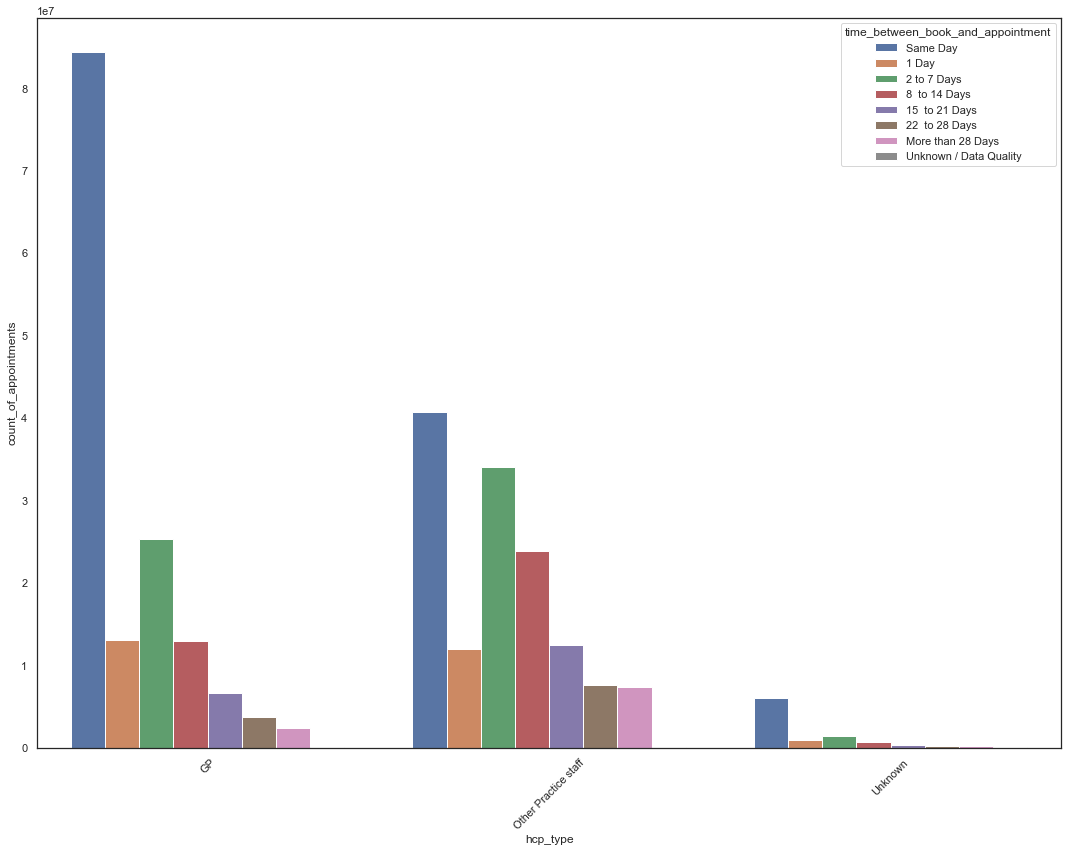

In [84]:
sns.barplot(data=am, x='hcp_type', y='count_of_appointments', hue='time_between_book_and_appointment')
plt.xticks(rotation=45)
plt.tight_layout()

In [95]:
# 3. Observing issues with waiting times, by aggregating number of appointments by waiting time & appointment status
ast=ar_2021_08.groupby(['appointment_status', 'time_between_book_and_appointment', 'waiting_time_ordinal'], as_index=False)\
.sum('count_of_appointments').sort_values(['appointment_status', 'waiting_time_ordinal'], ascending=True)
ast

,appointment_status,time_between_book_and_appointment,waiting_time_ordinal,count_of_appointments
6,Attended,Same Day,0,125798420
0,Attended,1 Day,1,24012214
2,Attended,2 to 7 Days,2,54639327
4,Attended,8 to 14 Days,3,32528864
1,Attended,15 to 21 Days,4,16512807
3,Attended,22 to 28 Days,5,9480045
5,Attended,More than 28 Days,6,7546107
7,Attended,Unknown / Data Quality,7,139910
14,DNA,Same Day,0,2289152
8,DNA,1 Day,1,1045140


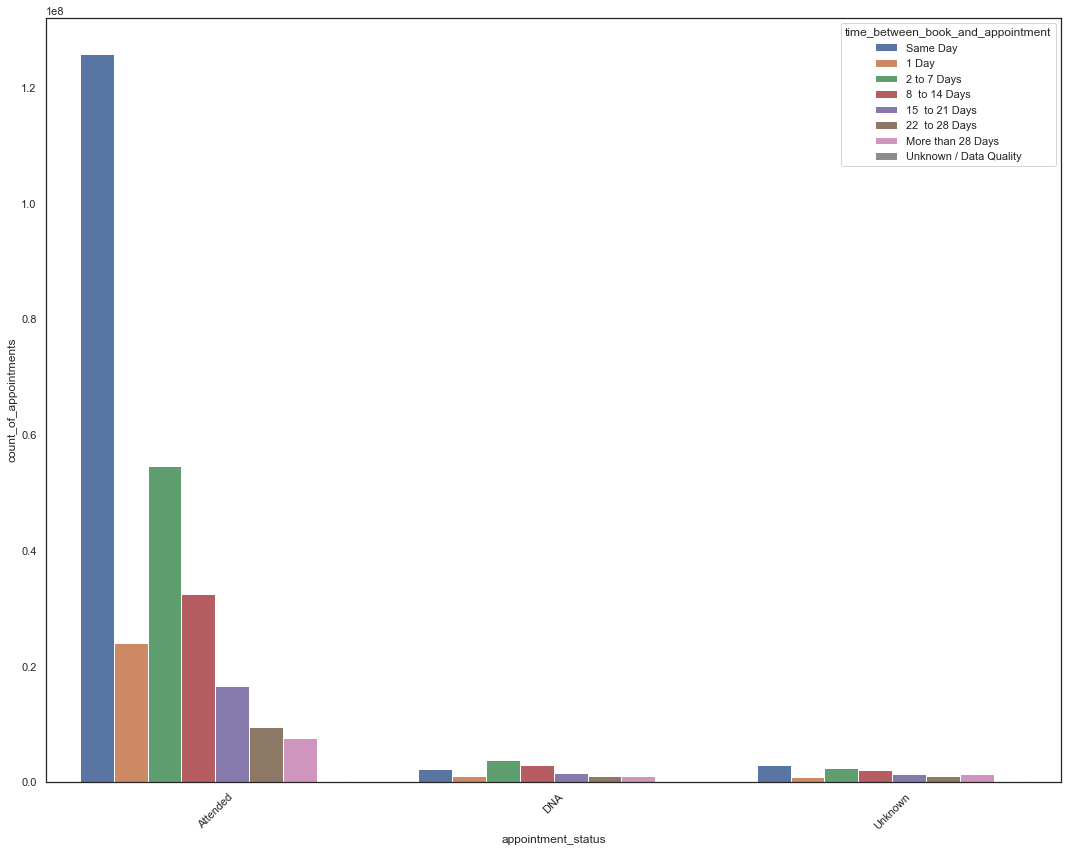

In [96]:
sns.barplot(data=ast, x='appointment_status', y='count_of_appointments', hue='time_between_book_and_appointment')
plt.xticks(rotation=45)
plt.tight_layout()

In [101]:
# Determine the total number of appointments per month.
ar_2021_08_monthly = ar_2021_08.groupby(['appointment_month'], as_index=False).agg({'count_of_appointments':'sum'})

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_2021_08_monthly['avg_utilization'] = np.round(ar_2021_08_monthly['count_of_appointments'] / 30, 1)
ar_2021_08_monthly['percentage_utilization'] = ar_2021_08_monthly['avg_utilization']/(1.2*10**6)

# View the DataFrame.
ar_2021_08_monthly

,appointment_month,count_of_appointments,avg_utilization,percentage_utilization
0,2021-08,23852171,795072.4,0.662560
1,2021-09,28522501,950750.0,0.792292
2,2021-10,30303834,1010127.8,0.841773
3,2021-11,30405070,1013502.3,0.844585
4,2021-12,25140776,838025.9,0.698355
5,2022-01,25635474,854515.8,0.712097
6,2022-02,25355260,845175.3,0.704313
7,2022-03,29595038,986501.3,0.822084
8,2022-04,23913060,797102.0,0.664252
9,2022-05,27495508,916516.9,0.763764


<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

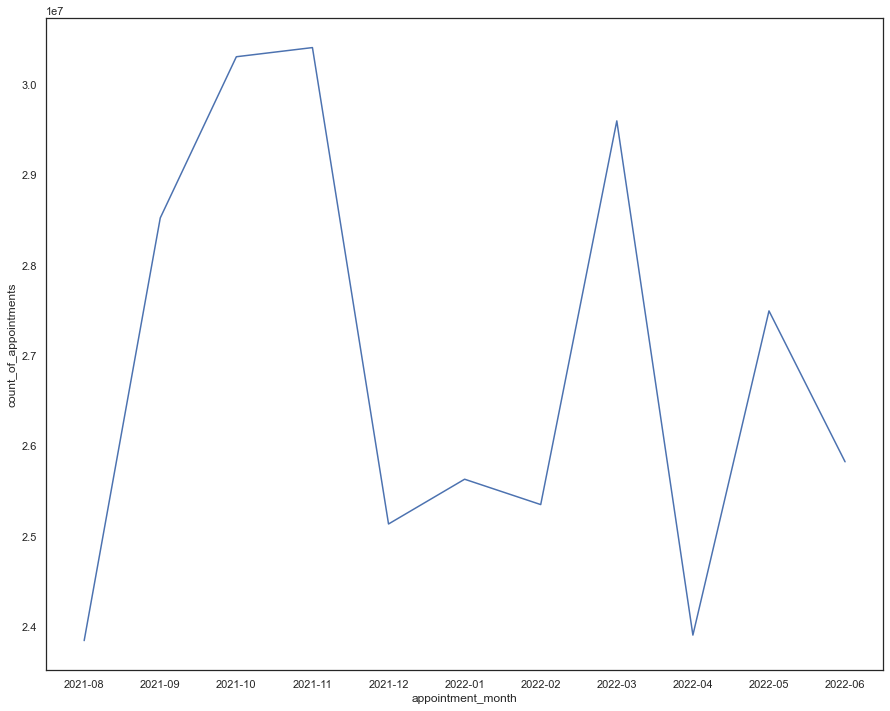

In [97]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
# Create a lineplot with Seaborn.
sns.lineplot(data = ar_2021_08_monthly, x='appointment_month', y='count_of_appointments')

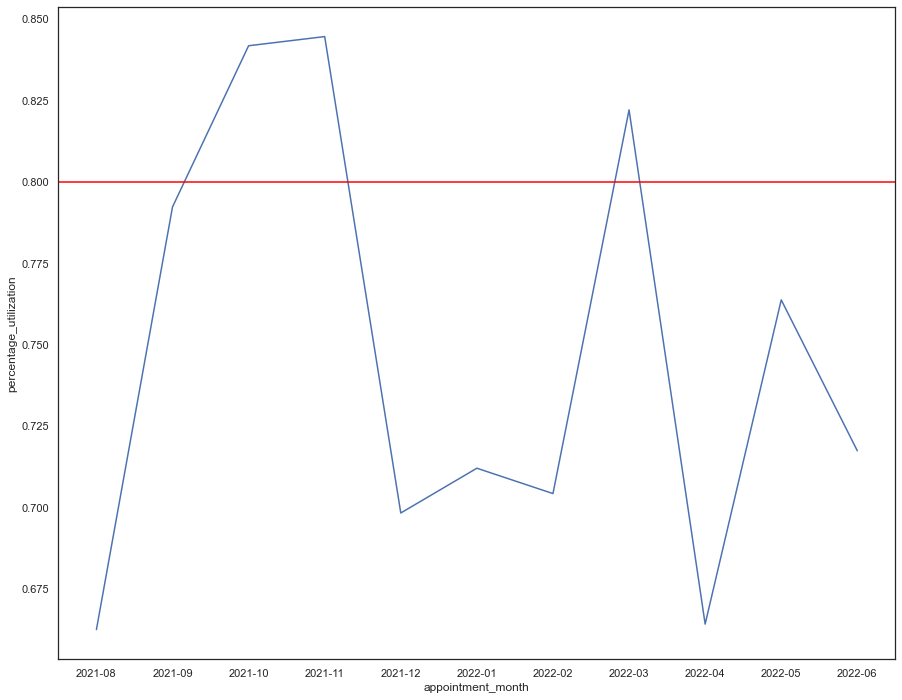

In [107]:
# Plot monthly capacity utilisation.
# Create a lineplot.
graph = sns.lineplot(data = ar_2021_08_monthly, x='appointment_month', y='percentage_utilization')
graph.axhline(.8, color='red')
plt.show()

**Question 2:** How do the healthcare professional types differ over time?

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

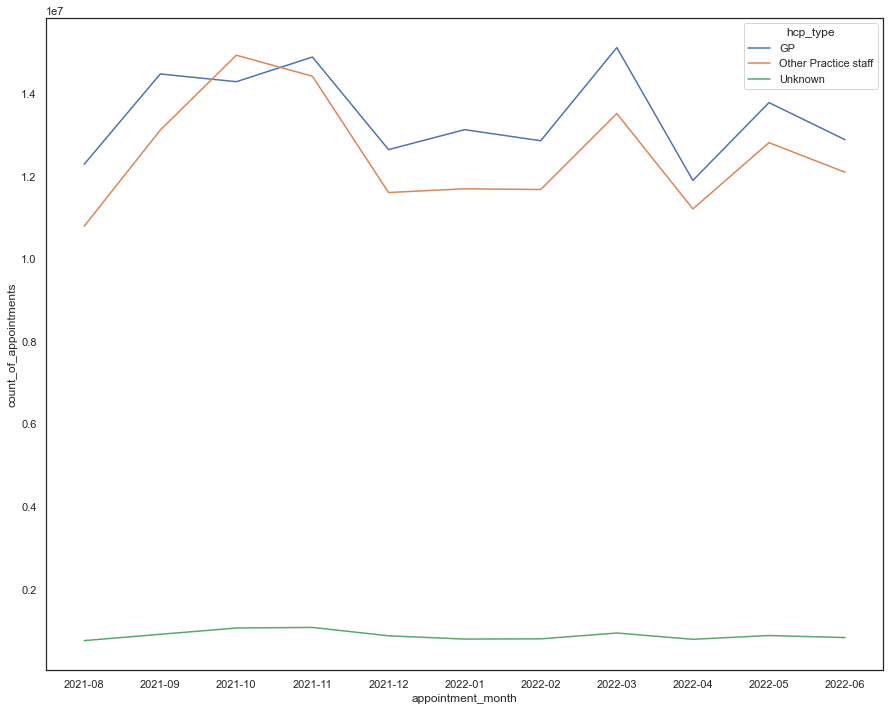

In [108]:
# Create a line plot to answer the question.
ar_2021_08_monthly_hp = ar_2021_08.groupby(['hcp_type', 'appointment_month'], 
as_index=False).agg({'count_of_appointments':'sum'})\
.sort_values(['hcp_type', 'appointment_month'])

sns.lineplot(data=ar_2021_08_monthly_hp, x='appointment_month', y='count_of_appointments', hue='hcp_type')

**Question 3:** Are there significant changes in whether or not visits are attended?

In [109]:
# Calculates total appointments and percentages by status
tmp = ar_2021_08_monthly[['appointment_month', 'count_of_appointments']]
tmp.columns = ['appointment_month', 'total_appointments']
ar_2021_08_monthly_attended = ar_2021_08.groupby(['appointment_status', 'appointment_month'], 
as_index = False).agg({'count_of_appointments':'sum'})\
.sort_values(['appointment_status', 'appointment_month'])

ar_2021_08_monthly_attended = ar_2021_08_monthly_attended.merge(tmp)
ar_2021_08_monthly_attended['percentage_appointments_bystatus'] = \
ar_2021_08_monthly_attended['count_of_appointments'] / ar_2021_08_monthly_attended['total_appointments']
ar_2021_08_monthly_attended

,appointment_status,appointment_month,count_of_appointments,total_appointments,percentage_appointments_bystatus
0,Attended,2021-08,22081765,23852171,0.925776
1,DNA,2021-08,949137,23852171,0.039792
2,Unknown,2021-08,821269,23852171,0.034432
3,Attended,2021-09,25757066,28522501,0.903044
4,DNA,2021-09,1321348,28522501,0.046327
5,Unknown,2021-09,1444087,28522501,0.050630
6,Attended,2021-10,27170506,30303834,0.896603
7,DNA,2021-10,1565624,30303834,0.051664
8,Unknown,2021-10,1567704,30303834,0.051733
9,Attended,2021-11,27667665,30405070,0.909969


(0.875, 0.95)

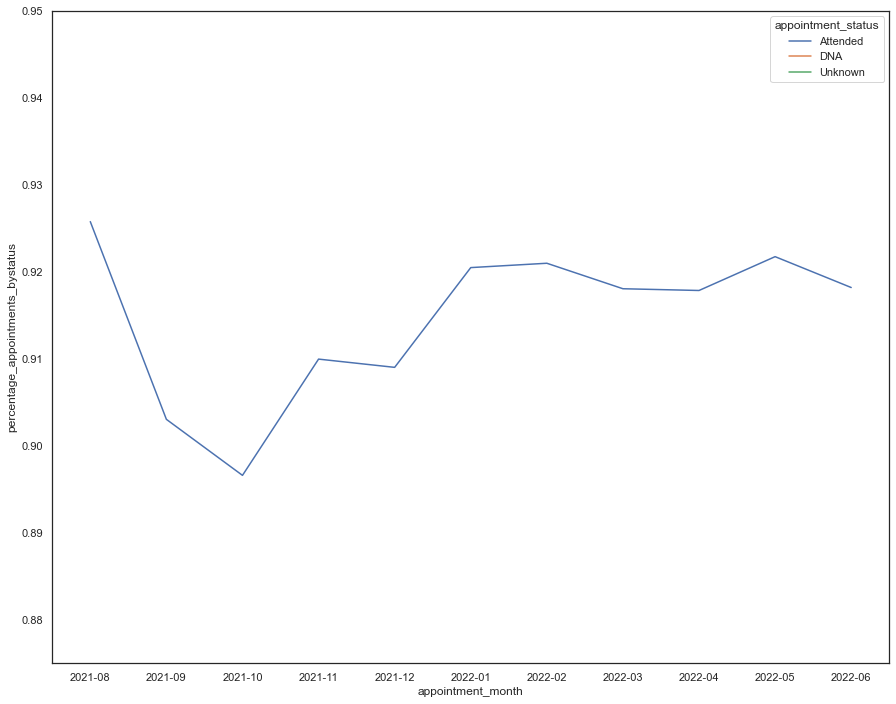

In [110]:
# Create a line plot to answer the question.
# Plot a zoom on the Attended appointments trend
sns.lineplot(data=ar_2021_08_monthly_attended, 
             x='appointment_month', y='percentage_appointments_bystatus', hue='appointment_status')
plt.ylim(0.875, 0.95)

(0.03, 0.055)

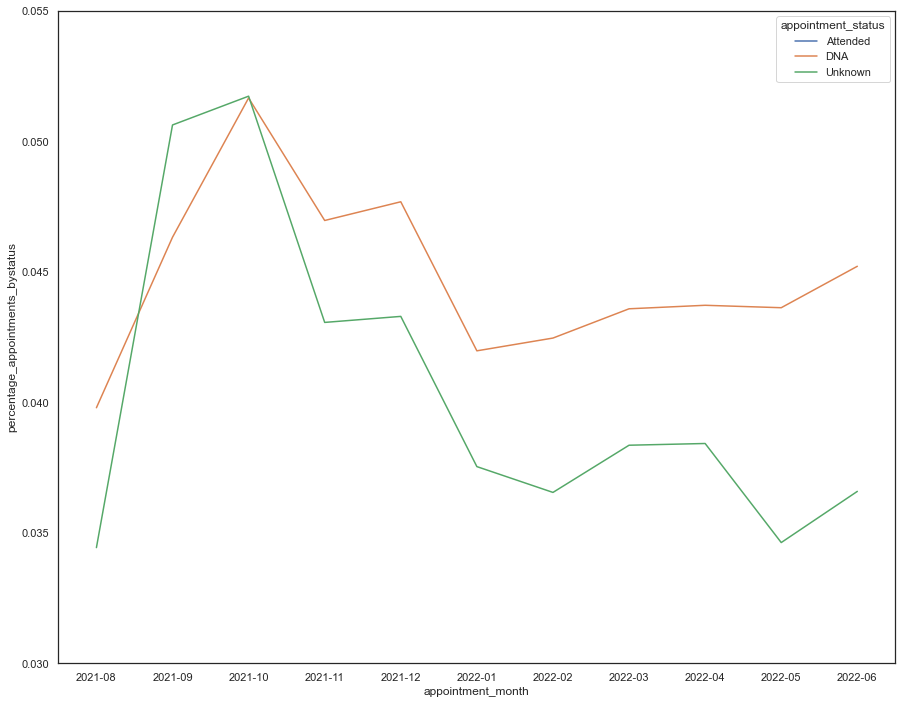

In [111]:
# Plot a zoom on the DNA and Unknown appointments trend
sns.lineplot(data=ar_2021_08_monthly_attended, 
             x='appointment_month', y='percentage_appointments_bystatus', hue='appointment_status')
plt.ylim(0.03, 0.055)

**Question 4:** Are there changes in terms of appointment type and the busiest months?

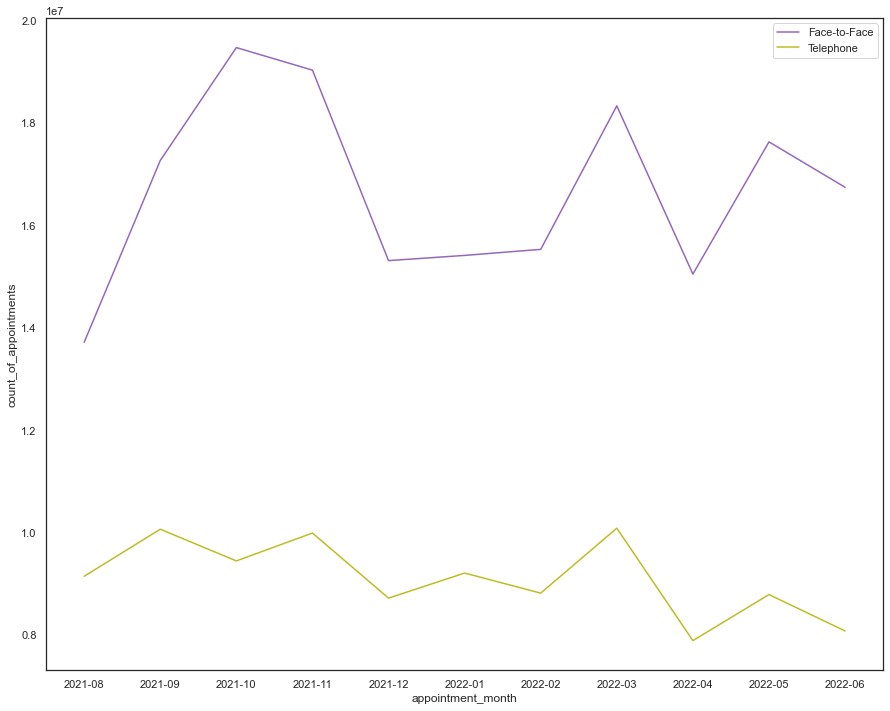

In [113]:
# Create a line plot to answer the question.
ar_2021_08_monthly_mode = ar_2021_08[ar_2021_08['appointment_mode'].isin(['Telephone', 'Face-to-Face'])]\
.groupby(['appointment_mode', 'appointment_month'])\
.agg({'count_of_appointments':'sum'}).sort_values(['appointment_mode', 'appointment_month'])
sns.lineplot(data = ar_2021_08_monthly_mode, x='appointment_month', y='count_of_appointments', hue='appointment_mode', \
             palette={'Telephone': 'tab:olive', 'Face-to-Face': 'tab:purple'})
plt.legend(loc='upper right')

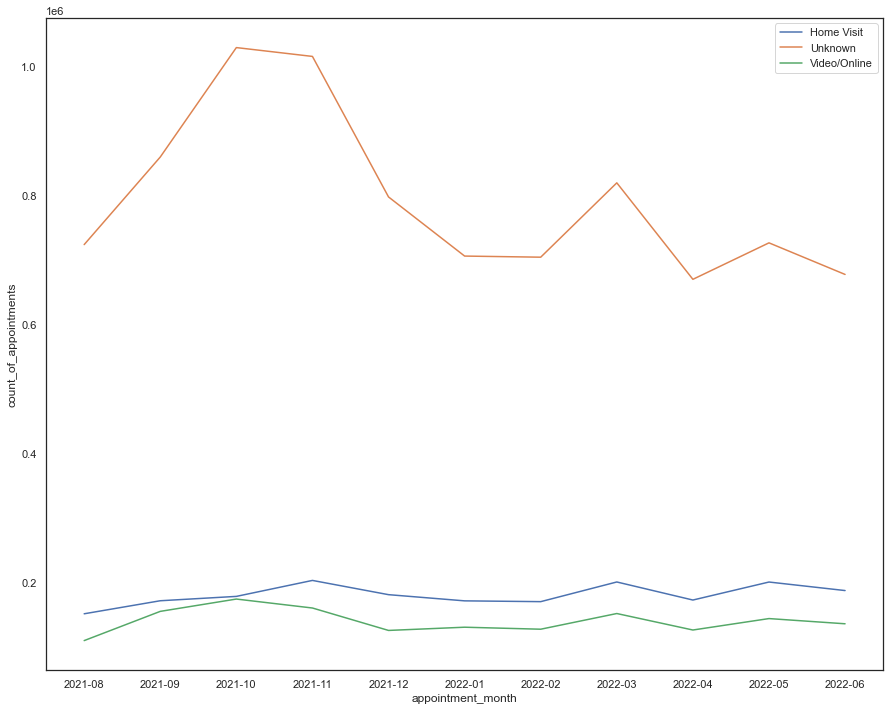

In [114]:
ar_2021_08_monthly_mode = ar_2021_08[ar_2021_08['appointment_mode'].isin(['Home Visit', 'Video/Online', 'Unknown'])]\
.groupby(['appointment_mode', 'appointment_month'])\
.agg({'count_of_appointments':'sum'}).sort_values(['appointment_mode', 'appointment_month'])
sns.lineplot(data = ar_2021_08_monthly_mode, x='appointment_month', y='count_of_appointments', \
             hue='appointment_mode')
plt.legend(loc='upper right')


**Question 5:** Are there any trends in time between booking an appointment?

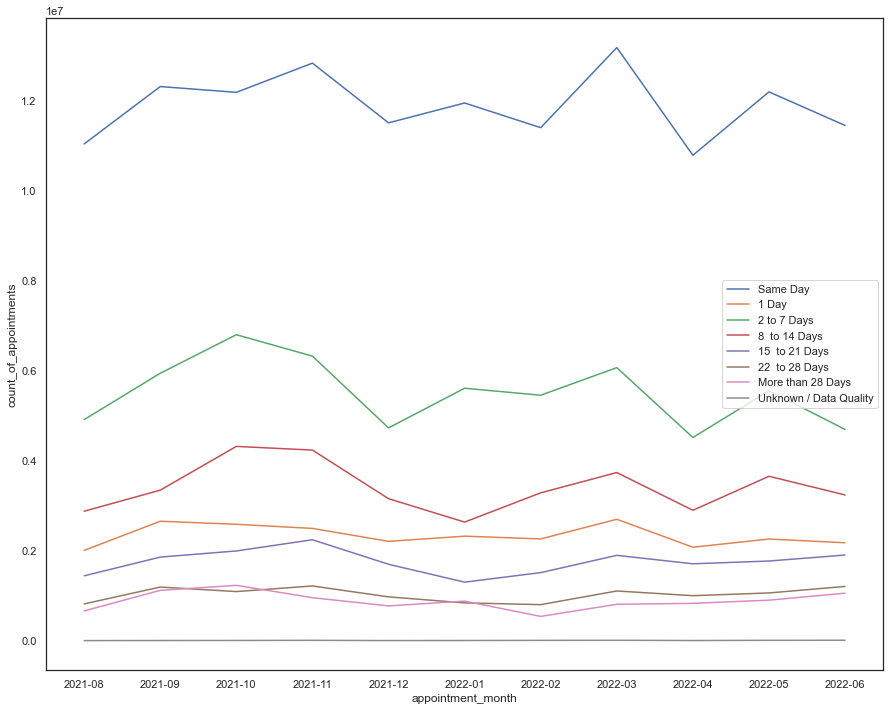

In [115]:
# Create a line plot to answer the question.
wt_trend = ar_2021_08.groupby(['time_between_book_and_appointment', 'waiting_time_ordinal', 'appointment_month'], \
as_index=False).sum('count_of_appointments')\
.sort_values(['waiting_time_ordinal', 'appointment_month'], ascending=True)

sns.lineplot(data = wt_trend, x='appointment_month', y='count_of_appointments', \
             hue='time_between_book_and_appointment')
plt.legend(loc='right')

**Question 6:** How do the spread of service settings compare?

In [116]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,count_of_records
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08,
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08,
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08,
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08,
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08,
...,...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06,
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06,
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06,
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06,


In [117]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_monthly = nc[['service_setting', 'appointment_month', 'count_of_appointments']].reset_index()
nc_monthly = nc_monthly.groupby(['service_setting', 'appointment_month'], as_index=False)\
.agg({'count_of_appointments':'sum'}).sort_values(['service_setting', 'appointment_month'])
# View the DataFrame.
nc_monthly

,service_setting,appointment_month,count_of_appointments
0,Extended Access Provision,2021-08,160927
1,Extended Access Provision,2021-09,187906
2,Extended Access Provision,2021-10,209539
3,Extended Access Provision,2021-11,207577
4,Extended Access Provision,2021-12,173504
5,Extended Access Provision,2022-01,186375
6,Extended Access Provision,2022-02,196627
7,Extended Access Provision,2022-03,231905
8,Extended Access Provision,2022-04,192284
9,Extended Access Provision,2022-05,220511


<AxesSubplot:xlabel='count_of_appointments', ylabel='service_setting'>

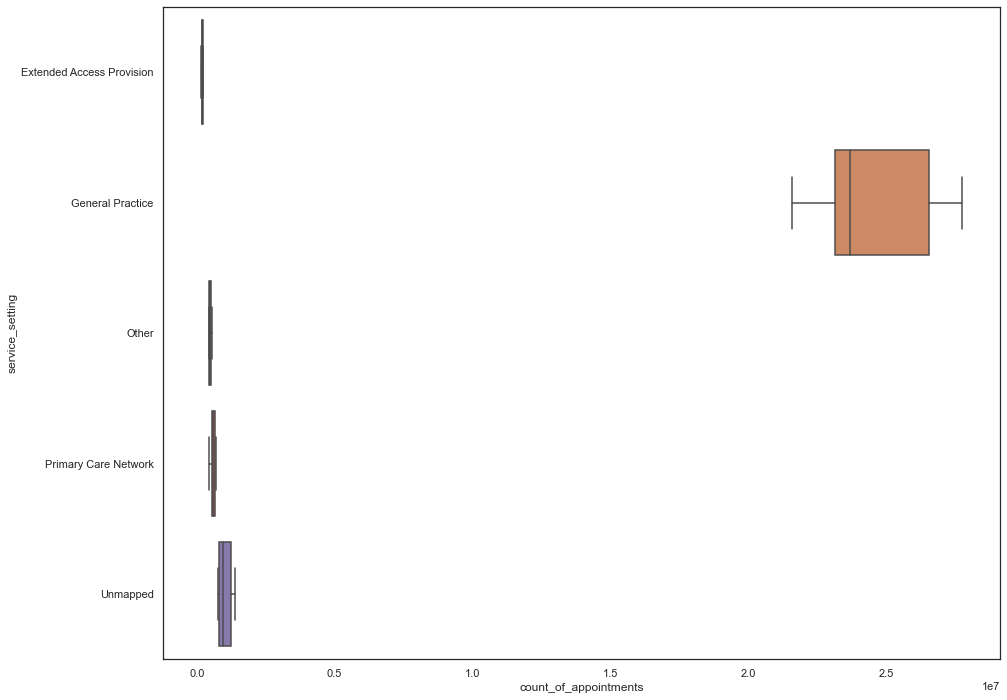

In [118]:
# Create a boxplot to investigate spread of service settings.
sns.boxplot(data=nc_monthly, x= 'count_of_appointments', y = 'service_setting')

<AxesSubplot:xlabel='count_of_appointments', ylabel='service_setting'>

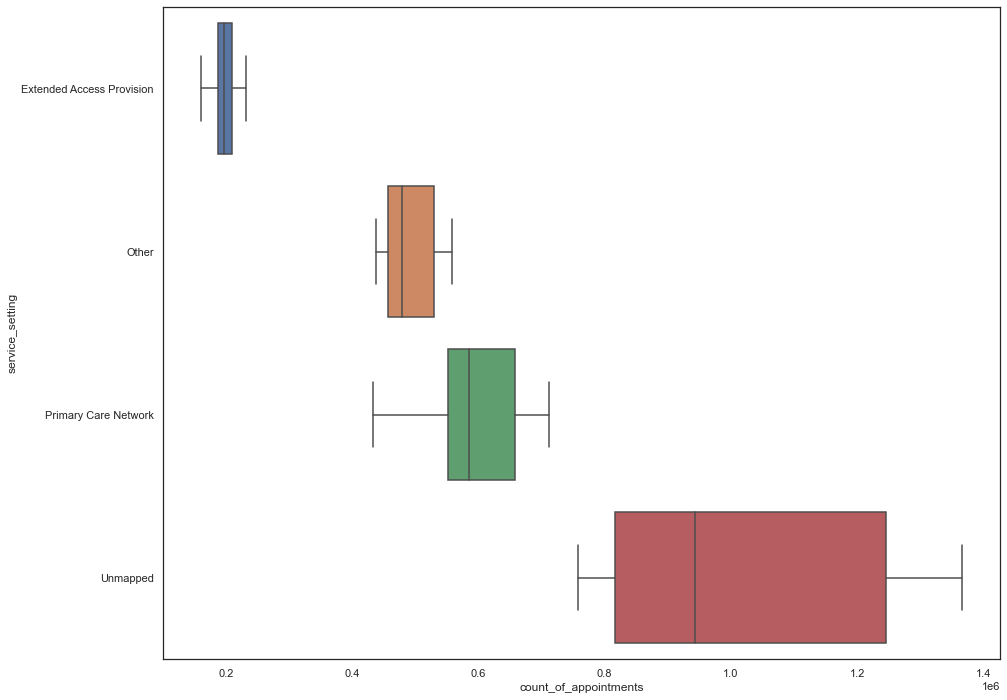

In [119]:
# Create a boxplot to investigate the service settings without GP.
sns.boxplot(data=nc_monthly[nc_monthly['service_setting']!='General Practice'], 
            x= 'count_of_appointments', y = 'service_setting')

# 

### Provide a summary of your findings and recommendations based on the analysis.

Here’s a summary of the insights:
* There are 106 locations, the main service provided is GP (General Practice) as a General Consultation Routine, and most of the appointments are attended
* The three datasets provided cover different periods, overlapping between 01/12/2021 and 01/06/2022. However, the main dataframe used for the analysis (nc – national categories) covers from 01/08/2021 until 30/06/2022
* The overall trend of appointments follows the main service, General practice: presents a peak in November 2022, a quiet period during the start 2022, ascending with the start of Spring with a sharp decrease during April (corresponding with Easter) to slightly peak towards the start of summer and a final downward trend
* In term of context, we only have meaningful data for appointments requested to get care. The rest of the data are either mapped inconsistently or unmapped.
* In terms of categories, General Consultation Routine is by far the top category, conserving the trend observed for the previous analysis, with main peaks in Nov 2021 and March 2022. Focusing the analysis on the top 7 categories, is important to notice that a substantial portion of data is Unmapped.
* Seasonal trends (Summer ‘21/ Autumn ‘21/ Winter ‘22/ Spring ’22) are similar in all seasons, where the services peak at the start at the week (Mondays) with a stable downward trend through the working days and a sharp downward dip on weekends (which extends to bank holidays and festivities), as perhaps the availability of healthcare professionals is limited on Saturdays and absent on Sundays
* On the top 30 trending healthcare hashtags of Twitter in UK, NHS does not appear and neither do any of its services.
* Waiting times for appointment seem in total very good, with a majority being same day appointments available. The same can be observed looking at waiting time distributions by appointment modes and healthcare professionals. As highlighted with the analysis methods, it would be more meaningful to observe this data with more granularity in terms of locations, as services waiting times might differ considerably.
* Considering a capacity of 1.2M appointments per months, within the timeframe considered the service has been within capacity. The red line highlighted in the graph [107] set the threshold of 80% capacity, which has been breached during peak periods.

Setting aside the quality of the datasets and considerations about accuracy and granularity of the data provided for the analysis:
* The waiting times highlight that though the general capacity of appointments in the overall network is satisfactory; it would be beneficial to investigate the granularity of waiting times based on location, as it is not possible to establish targeted actions on the current dataset
* The utilisation of resources is stretched over 80% in peak periods and is otherwise appropriate. The data granularity for resources and their allocation was very scarce in this dataset. As per the capacity, it is necessary to have a more granular dataset to indicate

All visualisations highlight a very clear pattern: considering that the appointment requests are driven mainly from GP general consultations, the trend is cyclical and seasonal. Understandably, the health conditions are correlated with the seasons, with a peak at the start of winter (where presumably the cold/flu related conditions are more relevant) and at the start of spring (perhaps for the increase of allergens and pollens and the weather conditions). Requests are significantly low during festivities and breaks (Christmas, Easter, Bank Holidays) and have quite a clear weekly pattern, as described on the insights.
On top of the suggestion provided to improve the quality and the granularity of the dataset for further insights, the resources and capacity planning should focus on seasonality and yearly festivity calendar, focusing especially on the peak periods (yearly, monthly and weekly)
To benefit from the impact of social media for the planning of these services, NHS should involve the public in specific discussions regarding its services expectations, perhaps with tailored hashtags on different topics and services.